In [1]:
import pandas as pd
filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list=[]
for source,filepath in filepath_dict.items():
    df=pd.read_csv(filepath,names=['sentence','label'], sep='\t')
    df['source']=source
    df_list.append(df)
df=pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [2]:
sentences=['John likes ice cream' , 'John hates chocolate.']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=0,lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [3]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split
df_yelp=df[df['source']=='yelp']
sentences=df_yelp['sentence'].values
y=df_yelp['label'].values
sentences_train,sentences_test,y_train,y_test=train_test_split(sentences,y,test_size=0.25,random_state=1000)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(sentences_train)
X_train=vectorizer.transform(sentences_train)
X_test=vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [6]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
score=classifier.score(X_test,y_test)
print("Accuracy:" ,score)

Accuracy: 0.796


C:\Users\Rakshika Bawari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
#we just did it on yelp dataset,lets try the model on other datasets


In [8]:
for source in df['source'].unique():
    df_source=df[df['source']==source]
    sentences=df_source['sentence'].values
    y=df_source['label'].values
    sentences_train,sentences_test,y_train,y_test=train_test_split(sentences,y,test_size=0.25,random_state=1000)
    vectorizer=CountVectorizer()
    
    vectorizer.fit(sentences_train)
    X_train=vectorizer.transform(sentences_train)
    X_test=vectorizer.transform(sentences_test)
    
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    score=classifier.score(X_test,y_test)
    print('Accuracy for {} data: {:.4f}'.format(source,score))


Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


In [9]:
from keras.models import Sequential
from keras import layers
input_dim=X_train.shape[1]
model=Sequential()
model.add(layers.Dense(10,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10)

Instructions for updating:
Use tf.cast instead.


In [13]:
loss,accuracy=model.evaluate(X_train,y_train,verbose=False)
print("Training accuracy : {:.4f}".format(accuracy))

Training accuracy : 1.0000


In [14]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print("Testing accuracy : {:.4f}".format(accuracy))

Testing accuracy : 0.7914


In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

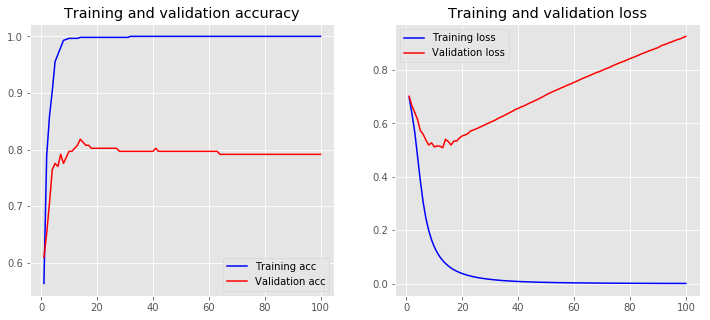

In [18]:
plot_history(history)

In [36]:
#earlier i used bow model now we use one hot encoding
#an example of one hot encoding
cities=['London','Berlin','Berlin','New York','London']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
city_labels=encoder.fit_transform(cities)
city_labels

array([1, 0, 0, 2, 1], dtype=int64)

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto',sparse=False) 
encoder.fit_transform(city_labels)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [47]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train=tokenizer.texts_to_sequences(sentences_train)
X_test=tokenizer.texts_to_sequences(sentences_test)
vocab_size=len(tokenizer.word_index)+1
print(sentences_train[2])
print(X_train[2])


I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [53]:
for word in['the','all','a']:
      print('{}: {}'.format(word,tokenizer.word_index[word]))

the: 1
all: 27
a: 2


In [55]:
#padding in keras
from keras.preprocessing.sequence import pad_sequences
maxlen=100
X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)
print(X_train[0,:])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [56]:
from keras.models import Sequential
from keras import layers
embedding_dim=50
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy: 0.6684


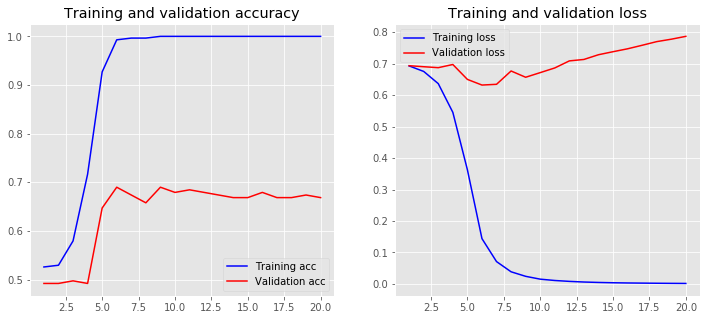

In [57]:
history=model.fit(X_train,y_train,epochs=20,verbose=False,validation_data=(X_test,y_test),batch_size=10)
loss,accuracy=model.evaluate(X_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))
plot_history(history)

In [59]:
from keras.models import Sequential
from keras import layers
embedding_dim=50
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Training Accuracy: 1.0000
Testing Accuracy: 0.7647


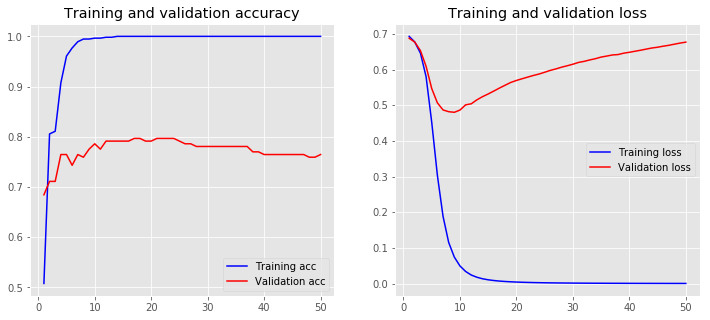

In [60]:
history=model.fit(X_train,y_train,epochs=50,verbose=False,validation_data=(X_test,y_test),batch_size=10)
loss,accuracy=model.evaluate(X_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))
plot_history(history)
